In [2]:
import pandas as pd
import numpy as np
import timeit

from matplotlib import pyplot as plt
from matplotlib import rcParams
plt.style.use('ggplot')
rcParams['figure.figsize'] = (20.0, 10.0)
from matplotlib import colors

import scipy.stats

In [5]:
credible_authors = pd.read_csv('data/authors-scientific-atleast-5-year_extended.csv', encoding='utf-8')

In [6]:
credible_authors = credible_authors.set_index('start_year')

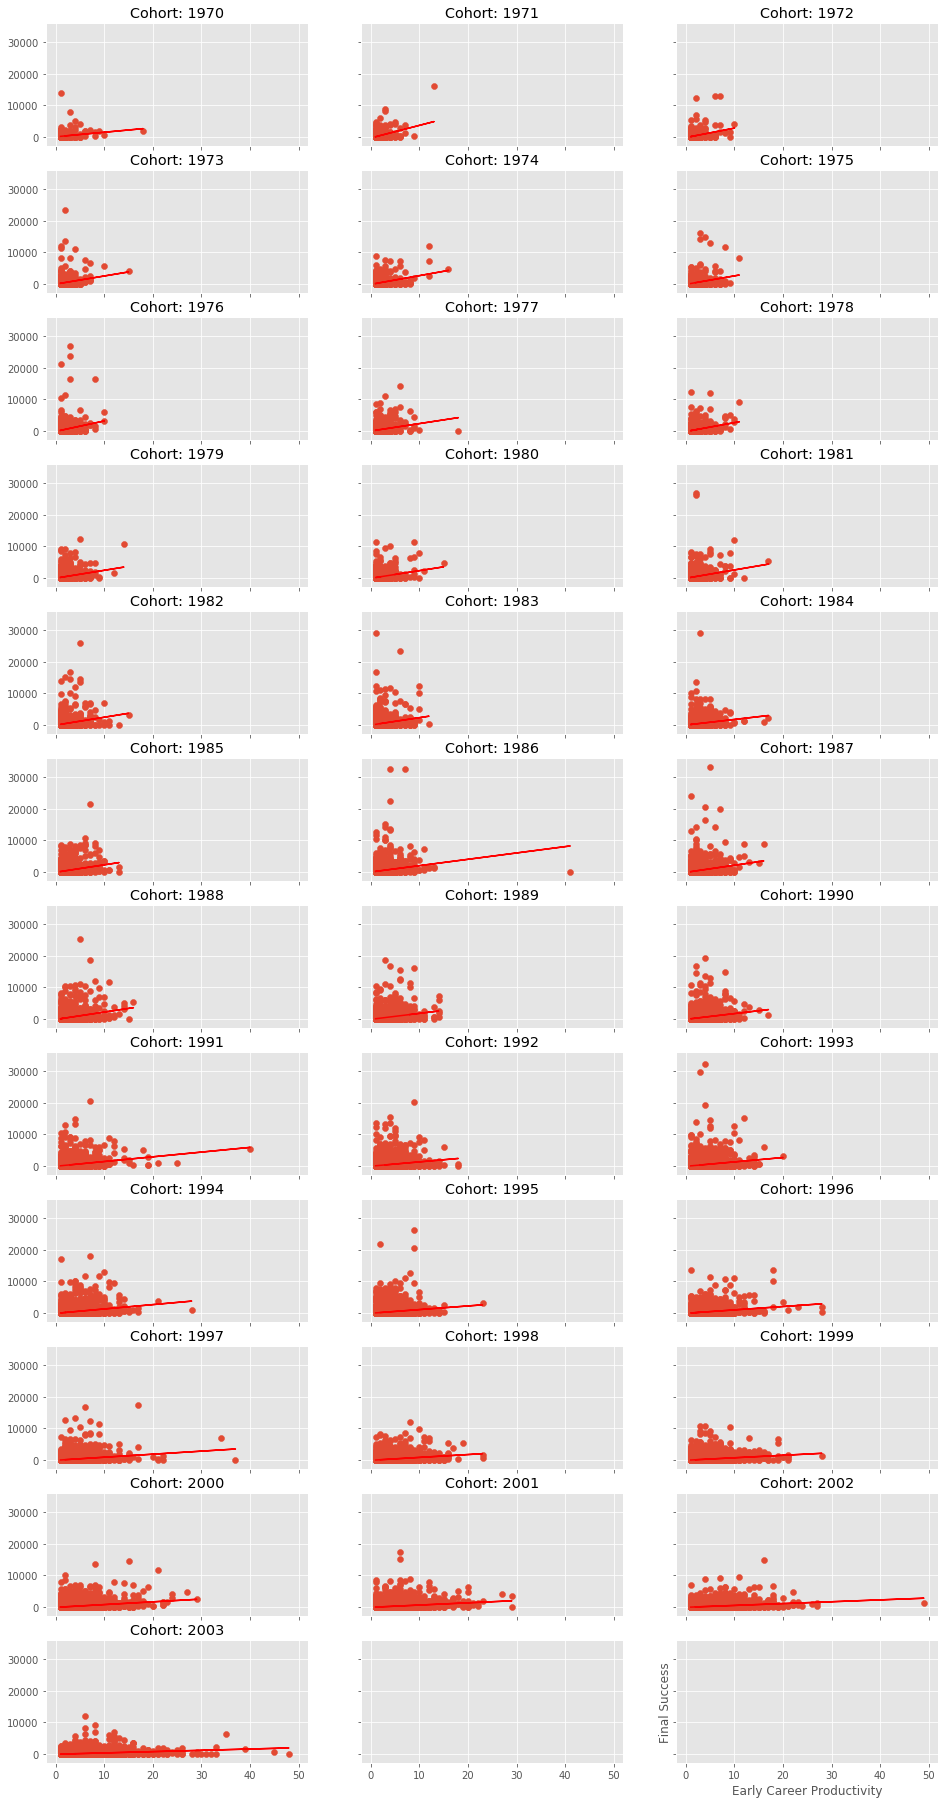

In [7]:
fig, ax = plt.subplots(nrows=12, ncols=3, sharex=True, sharey=True, figsize=(16,32))
for year in range(1970, 2004):
    data = credible_authors.loc[year]
    x = data['early_career_prod']
    y = data['final_citation_count']
    axes = ax[(year-1970)//3,year%1970%3]
    axes.scatter(x, y)
    fit = np.polyfit(x, y, deg=1)
    axes.plot(x, fit[0] * x + fit[1], color='red')
    axes.set_title("Cohort: " + str(year))
    # plt.xlim(0, 50)
    # plt.ylim(0,200)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
#     print("R squared: ", r_value)
    #     print(slope, intercept)
plt.xlabel('Early Career Productivity')
plt.ylabel('Final Success')
plt.show()

In [8]:
credible_authors.head()

,end_year,num_pub,career_length,early_career_prod,early_career_prod_1,early_career_prod_2,early_career_qual,final_citation_count
start_year,,,,,,,,
2001,2015,2,15,1,1,1,25,25.0
1992,2005,2,14,1,1,1,0,0.0
1979,2017,191,39,1,1,1,0,799.0
1992,2006,3,15,1,1,1,0,0.0
2011,2016,9,6,1,1,1,0,19.0
